In [3]:
import pandas as pd
import os

In [7]:
dataset = pd.read_csv("HL_A_Scorecard_Data.csv")

In [11]:
dataset.head()

,prospect_no,loan_disb_date,asset_cost,disb_amt,down_payment,roi,age,is_exist_cust,dist_from_off,is_expat,...,locality,accommodation_type,current_residence,veh_own,foir,tenure,vin_in_business,ltv,target,random
0,1,21-11-2015,1467032,1100274,366758,16,48,0,29.0,0,...,Middle Class,Apartment,Owned,2,40,240,28,75,0,0.622896
1,2,05-11-2015,1113349,734810,378539,15,50,0,11.0,1,...,Below Avg,Villa,Rented,1,41,132,21,66,0,0.107378
2,3,01-12-2015,1660092,979454,680638,14,45,0,53.0,1,...,Below Avg,Villa,Rented,2,34,156,50,59,0,0.110078
3,4,06-10-2015,1061768,902503,159265,14,49,0,8.0,1,...,Middle Class,Apartment,Owned,2,41,120,19,85,0,0.144848
4,5,31-01-2015,1212534,836648,375886,19,36,0,48.0,0,...,Middle Class,Apartment,Owned,2,45,108,75,69,0,0.266234


In [15]:
import numpy as np
dev,val,holdout=np.split(dataset.sample(frac=1 ,random_state=1212),[int(.5*len(dataset)),int(.8*len(dataset))])
(len(dev),len(val),len(holdout))

C:\Users\smart\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


(10000, 6000, 4000)

In [17]:
#random sampling
print("population default rate :" ,
      round(sum(dataset.target)*100/len(dataset),2),"%")
print("development sample default rate :" ,
      round(sum(dev.target)*100/len(dev),2),"%")
print("validation sample population default rate :" ,
      round(sum(val.target)*100/len(val),2),"%")
print("holdout sample population default rate :" ,
      round(sum(holdout.target)*100/len(holdout),2),"%")


population default rate : 7.0 %
development sample default rate : 6.89 %
validation sample population default rate : 7.12 %
holdout sample population default rate : 7.08 %


In [19]:
import statsmodels.formula.api as sm
import statsmodels.api as sma
mylogit = sm.glm(
    formula= "target~gender",data = dataset ,
    family=sma.families.Binomial()
).fit()
mylogit.summary()
#we chech probability


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                20000
Model:                            GLM   Df Residuals:                    19998
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5070.2
Date:                Tue, 28 Jan 2025   Deviance:                       10140.
Time:                        16:39:02   Pearson chi2:                 2.00e+04
No. Iterations:                     6   Pseudo R-squ. (CS):          2.877e-06
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -2.6071      0.087    -30.086      0.000      -2.777      -2.437
gender[T.Male]     0.0219      0.091      0.239      0.811      -0.157       0.201
==================================================================================
"""

In [21]:
dev.describe(include = "all")

,prospect_no,loan_disb_date,asset_cost,disb_amt,down_payment,roi,age,is_exist_cust,dist_from_off,is_expat,...,locality,accommodation_type,current_residence,veh_own,foir,tenure,vin_in_business,ltv,target,random
count,10000.000000,10000,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,9914.000000,10000.000000,...,10000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
unique,NaN,366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4,3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,21-10-2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Middle Class,Apartment,Owned,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5305,5875,5324,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,10019.628700,NaN,1.176582e+06,7.831851e+05,3.933966e+05,15.091200,44.959300,0.184400,23.117107,0.498500,...,NaN,NaN,NaN,1.618500,44.578400,149.514000,38.865100,66.469300,0.068900,0.498077
std,5757.341915,NaN,3.331575e+05,2.752750e+05,2.069743e+05,3.050969,8.043775,0.387829,18.132800,0.500023,...,NaN,NaN,NaN,0.626576,8.685217,57.577573,23.259493,13.985686,0.253297,0.289402
min,1.000000,NaN,3.011490e+05,1.337440e+05,2.147500e+04,8.000000,20.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,0.000000,26.000000,60.000000,0.000000,40.000000,0.000000,0.000015
25%,5093.750000,NaN,9.732872e+05,5.998725e+05,2.396888e+05,12.000000,42.000000,0.000000,8.000000,0.000000,...,NaN,NaN,NaN,1.000000,39.000000,96.000000,19.000000,55.000000,0.000000,0.245449
50%,10037.000000,NaN,1.189590e+06,7.856960e+05,3.677605e+05,15.000000,45.000000,0.000000,19.000000,0.000000,...,NaN,NaN,NaN,2.000000,45.000000,144.000000,33.500000,66.000000,0.000000,0.498227
75%,14938.750000,NaN,1.387320e+06,9.497370e+05,5.256872e+05,18.000000,50.000000,0.000000,36.000000,1.000000,...,NaN,NaN,NaN,2.000000,51.000000,192.000000,58.000000,76.000000,0.000000,0.748837


C:\Users\smart\AppData\Local\Temp\ipykernel_3536\1169618041.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


<Figure size 900x500 with 0 Axes>

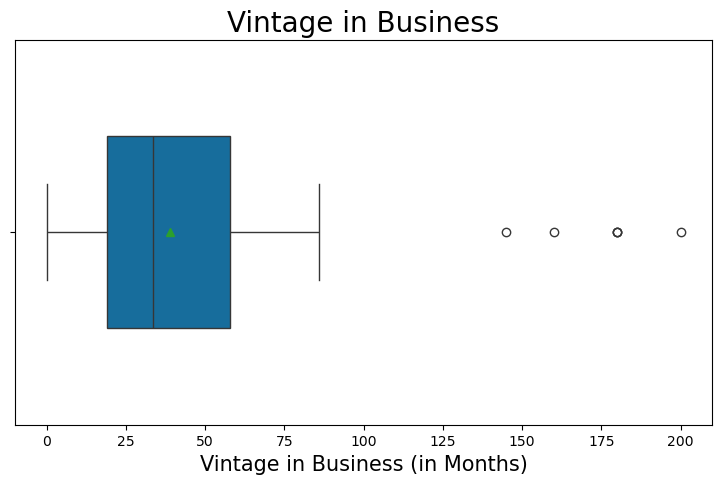

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure inline plotting for Jupyter Notebook
%matplotlib inline  

# Setting up the figure size
plt.figure(figsize=(9, 5))

# Correcting the seaborn boxplot syntax
sns.boxplot(
    x="vin_in_business",  # Column name in the dataset
    data=dev,  # The dataset variable
    showmeans=True,  # Show the mean in the plot
    width=0.5,  # Adjusting the width of the boxes
    palette="colorblind"  # Color palette for better visual accessibility
)

# Adding title and axis labels with appropriate font sizes
plt.title("Vintage in Business", fontsize=20)
plt.xlabel("Vintage in Business (in Months)", fontsize=15)

# Displaying the plot
plt.show()


In [33]:
Q1,Q3 =dev["vin_in_business"].quantile([0.25,0.75])
UCL = Q3 +1.5 *(Q3-Q1)
LCL = Q1 +1.5 *(Q3-Q1)
print("UCL =" ,round(UCL))

UCL = 116


In [35]:
dev["vin_in_zip_cap"]=dev["vin_in_business"].map(
    lambda x : 120 if x >120 else x
)

In [39]:
#to check missing values
missing_df = dev.isnull().sum(axis=0)
missing_df = missing_df[missing_df != 0]
missing_df 

dist_from_off      86
marital_status    478
dtype: int64

In [41]:
dev.shape

(10000, 28)

In [43]:
mylogit = sm.glm(
    formula= "target~dist_from_off",data = dataset ,
    family=sma.families.Binomial()
).fit()
mylogit.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                19816
Model:                            GLM   Df Residuals:                    19814
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4969.2
Date:                Tue, 28 Jan 2025   Deviance:                       9938.4
Time:                        18:24:39   Pearson chi2:                 1.98e+04
No. Iterations:                     6   Pseudo R-squ. (CS):           0.004656
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -2.9497      0.049    -60.389      0.000      -3.045      -2.854
dist_from_off     0.0142      0.001      9.742      0.000       0.011       0.017
=================================================================================
"""

In [47]:
#find the mean of all missing values
round(dev["dist_from_off"].mean())

23

In [55]:
#replace missing values with their mean
dev["dist_from_off_imputed"]=dev["dist_from_off"].fillna(
    round(dev["dist_from_off"].mean()))

In [61]:
mylogit = sm.glm(
    formula= "target~dist_from_off_imputed",data = dev ,
    family=sma.families.Binomial()
).fit()
mylogit.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9998
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2483.2
Date:                Tue, 28 Jan 2025   Deviance:                       4966.5
Time:                        18:34:19   Pearson chi2:                 9.99e+03
No. Iterations:                     6   Pseudo R-squ. (CS):           0.004907
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -2.9766      0.069    -42.878      0.000      -3.113      -2.841
dist_from_off_imputed     0.0148      0.002      7.108      0.000       0.011       0.019
=========================================================================================
"""

In [63]:
dataset.columns

Index(['prospect_no', 'loan_disb_date', 'asset_cost', 'disb_amt',
       'down_payment', 'roi', 'age', 'is_exist_cust', 'dist_from_off',
       'is_expat', 'children', 'earning_members', 'yrs_in_curr_resi',
       'source_type', 'marital_status', 'gender', 'applicant_type', 'locality',
       'accommodation_type', 'current_residence', 'veh_own', 'foir', 'tenure',
       'vin_in_business', 'ltv', 'target', 'random'],
      dtype='object')

In [65]:
import statsmodels.formula.api as sm
import statsmodels.api as sma
mylogit = sm.glm(
    formula= "target~ltv",data = dataset ,
    family=sma.families.Binomial()
).fit()
mylogit.summary()
#we chech probability


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                20000
Model:                            GLM   Df Residuals:                    19998
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4915.9
Date:                Tue, 28 Jan 2025   Deviance:                       9831.9
Time:                        20:21:50   Pearson chi2:                 1.97e+04
No. Iterations:                     6   Pseudo R-squ. (CS):            0.01531
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.9977      0.148    -33.827      0.000      -5.287      -4.708
ltv            0.0347      0.002     17.309      0.000       0.031       0.039
==============================================================================
"""